<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/T%C3%BCketici_Fiyat_Endeksi_(T%C3%9CFE)_Fark_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn ile daha estetik bir görselleştirme yapacağız

def tufe_verisi_olustur():
    # Aylık endeks değerleri (Baz yıl = 100)
    endeks_degerleri = [250.0, 255.5, 260.0, 275.5, 280.0, 295.0, 305.0, 310.0]

    # Tarihleri DataFrame index'i için oluşturma
    aylar = pd.to_datetime(['2024-01', '2024-02', '2024-03', '2024-04',
                            '2024-05', '2024-06', '2024-07', '2024-08'])

    df = pd.DataFrame({
        'TÜFE Endeksi': endeks_degerleri
    }, index=aylar)
    return df

In [2]:
def yuzdelik_degisim_hesapla(df):

    # Yeni Sütun Oluşturma: Yüzdelik Değişim (Aydan Aya Enflasyon)
    # .pct_change() metodu: Bir önceki satıra göre yüzdelik değişimi hesaplar (Konu 10)
    df['Aylik_Degisim'] = df['TÜFE Endeksi'].pct_change() * 100

    # İlk ayın değişimi NaN olacağı için onu 0.0 ile doldurabiliriz (Konu 10: Veri Temizliği)
    df['Aylik_Degisim'] = df['Aylik_Degisim'].fillna(0.0)

    print("\n--- Aylık TÜFE Değişim Tablosu (Enflasyon) ---")
    print(df[['TÜFE Endeksi', 'Aylik_Degisim']])

    # Enflasyonun zirve yaptığı ayı bulma
    zirve_ay = df['Aylik_Degisim'].idxmax()
    print(f"\nEn Yüksek Aylık Enflasyon: {zirve_ay.strftime('%Y-%m')} ayında gerçekleşti.")

    return df

In [3]:
def enflasyon_grafik_ciz(df):

    plt.figure(figsize=(10, 6))

    # Seaborn Barplot Kullanımı (Daha estetik)
    sns.barplot(x=df.index.strftime('%Y-%m'), y=df['Aylik_Degisim'], color='darkblue')

    plt.title("Aydan Aya TÜFE Yüzdelik Değişimi", fontsize=14)
    plt.xlabel("Ay")
    plt.ylabel("Değişim (%)")
    plt.xticks(rotation=45) # Tarih etiketlerinin üst üste binmesini önler
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout() # Grafiğin sıkışmasını önler

    plt.show()

--- Proje 2: Aylık TÜFE Fark Analizi Başladı ---

--- Aylık TÜFE Değişim Tablosu (Enflasyon) ---
            TÜFE Endeksi  Aylik_Degisim
2024-01-01         250.0       0.000000
2024-02-01         255.5       2.200000
2024-03-01         260.0       1.761252
2024-04-01         275.5       5.961538
2024-05-01         280.0       1.633394
2024-06-01         295.0       5.357143
2024-07-01         305.0       3.389831
2024-08-01         310.0       1.639344

En Yüksek Aylık Enflasyon: 2024-04 ayında gerçekleşti.


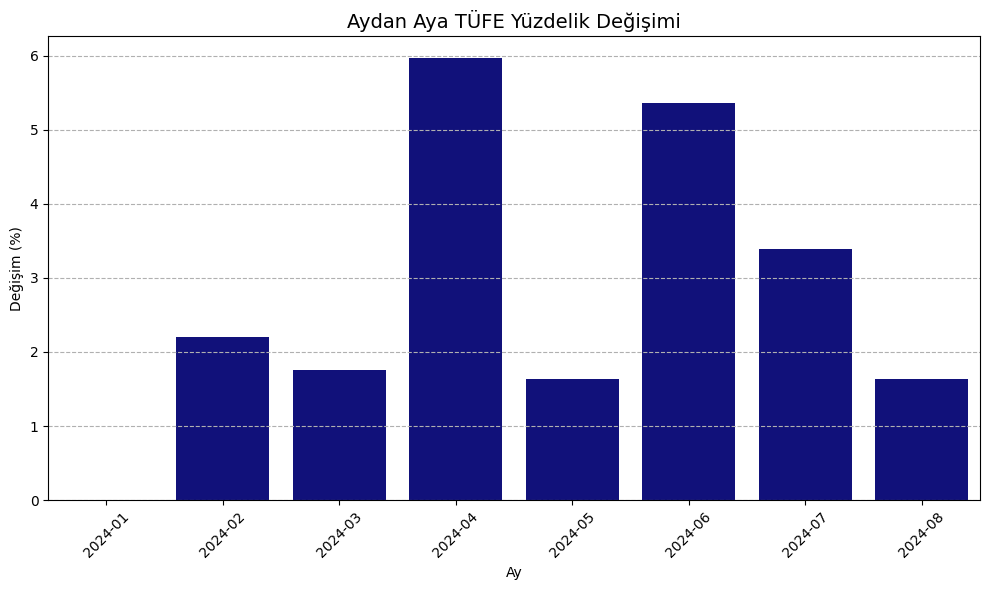

In [4]:
print("--- Proje 2: Aylık TÜFE Fark Analizi Başladı ---")
tufe_df = tufe_verisi_olustur()
analiz_tufe_df = yuzdelik_degisim_hesapla(tufe_df)
enflasyon_grafik_ciz(analiz_tufe_df)